# House predictions with linear regression

In [1]:
!git clone https://github.com/luisguiserrano/manning.git
%cd  manning/Chapter_3_Linear_Regression
!pip install turicreate

Cloning into 'manning'...
remote: Enumerating objects: 715, done.
remote: Counting objects: 100% (522/522), done.
remote: Compressing objects: 100% (353/353), done.
remote: Total 715 (delta 278), reused 388 (delta 154), pack-reused 193
Receiving objects: 100% (715/715), 50.91 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (345/345), done.
/content/manning/Chapter_3_Linear_Regression
     |████████████████████████████████| 92.0MB 44kB/s 
     |████████████████████████████████| 327kB 44.1MB/s 
     |████████████████████████████████| 3.5MB 35.9MB/s 
     |████████████████████████████████| 3.6MB 39.7MB/s 
     |████████████████████████████████| 86.4MB 53kB/s 
     |████████████████████████████████| 18.3MB 257kB/s 
     |████████████████████████████████| 450kB 31.1MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 3.8MB 33.7MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13700 sha256=1de0e6e858686ec93

In [2]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import utils

In [3]:
data = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /content/manning/Chapter_3_Linear_Regression/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.045979 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/manning/Chapter_3_Linear_Regression/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.028604 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


### Exploring the relationship between price and area

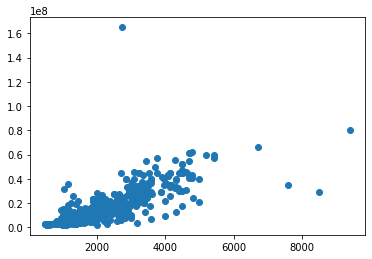

In [4]:
plt.scatter(data['Area'], data['Price'])

In [5]:
simple_model = tc.linear_regression.create(data, features=['Area'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.002053     | 144273246.871222   | 30909270.802363      | 4914876.103435                  | 4698627.402179                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [6]:
simple_model.coefficients

name,index,value,stderr
(intercept),None,-6401995.016735069,247342.49984750967
Area,None,9864.999325641014,137.6662017158251


In [7]:
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

slope: 9864.999325641014
y-intercept: -6401995.016735069


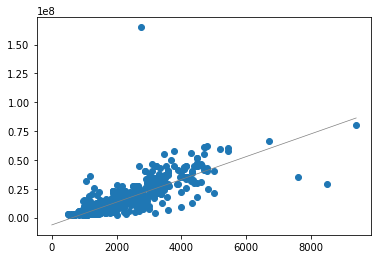

In [8]:
import utils

plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))

### Building a model that uses all the features

In [9]:
model = tc.linear_regression.create(data, target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 277

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.035014     | 140185473.421360   | 18922886.871396      | 4251463.935746                  | 3533648.412056                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [10]:
model.coefficients

name,index,value,stderr
(intercept),None,-2928302.054740671,609483.4530892461
Area,None,8928.914800571196,260.2995781993722
Location,Hitech City,4696844.212135199,788336.44408929
Location,Manikonda,138146.10178252732,677863.9602028517
Location,Alwal,-571976.45757342,1236310.4074149958
Location,Kukatpally,1746187.928428841,651740.7810767906
Location,Gachibowli,4798579.795449623,754191.9963540393
Location,Tellapur,-732313.3291275887,1084748.7358807027
Location,Kokapet,638300.063724931,816269.1900758485
Location,Mehdipatnam,363036.47924652934,1587367.3189752477


In [11]:
model.evaluate(data)

{'max_error': 140185473.42135996, 'rmse': 4218448.759797963}

In [12]:
house = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
house

Area,No. of Bedrooms
1000,3


In [13]:
model.predict(house)

dtype: float
Rows: 1
[2143031.8796562534]